In [23]:
import numpy as np
import seaborn as sns
%matplotlib inline

In [24]:
means = [1,-2,4]
cov_matrix = np.matrix([[0.6113,0.3416,0.3854],[0.3416,0.4955,0.1194],[0.3854,0.1194,0.3048]])
DF = 5

In [25]:
def multi_t_rvs(m, S, df=np.inf, n=1):
    '''generate random variables of multivariate t distribution
    Parameters
    ----------
    m : array_like
        mean of random variable, length determines dimension of random variable
    S : array_like
        square array of covariance  matrix
    df : int or float
        degrees of freedom
    n : int
        number of observations, return random array will be (n, len(m))
    Returns
    -------
    rvs : ndarray, (n, len(m))
        each row is an independent draw of a multivariate t distributed
        random variable
    '''
    m = np.asarray(m)
    d = len(m)
    if df == np.inf:
        x = 1.
    else:
        x = np.random.chisquare(df, n)/df
    z = np.random.multivariate_normal(np.zeros(d),S,(n,))
    return m + z/np.sqrt(x)[:,None]

In [26]:
sample = multi_t_rvs(means,cov_matrix,df=DF,n=1000)

In [27]:
print("The mean of the first marginal is ", np.mean(sample[:,0]))
print("The standard deviation of the first marginal is ", np.std(sample[:,0]))
print("The mean of the second marginal is ", np.mean(sample[:,1]))
print("The standard deviation of the second marginal is ", np.std(sample[:,1]))
print("The mean of the third marginal is ", np.mean(sample[:,2]))
print("The standard deviation of the third marginal is ", np.std(sample[:,2]))

The mean of the first marginal is  0.953141788118
The standard deviation of the first marginal is  1.03833977191
The mean of the second marginal is  -2.00599300869
The standard deviation of the second marginal is  0.979052529215
The mean of the third marginal is  3.95231486947
The standard deviation of the third marginal is  0.725235604072


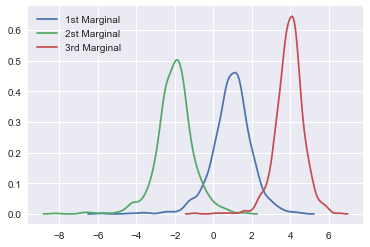

In [29]:
sns.distplot(sample[:,0], hist=False, label="1st Marginal")
sns.distplot(sample[:,1], hist=False, label="2st Marginal")
sns.distplot(sample[:,2], hist=False, label="3rd Marginal")

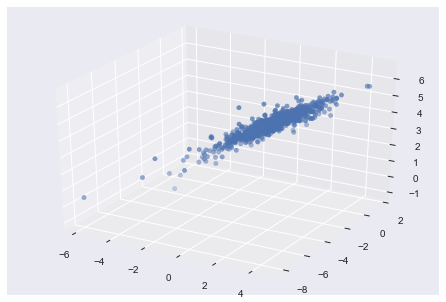

In [30]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(sample[:,0], sample[:,1], sample[:,2])
pyplot.show()